# **EDA Análisis Exploratorio de Datos - Google**

In [6]:
import pandas as pd
import re
import glob
import os
import pyarrow as pa
import pyarrow.parquet as pq
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
#import nltk
from nltk.corpus import stopwords
import ast 
import folium

In [7]:
df_google = pd.read_parquet('Datasets\Google\metadata-sitios\metadata-limpio.parquet')

In [8]:
df_google.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,[Pharmacy],4.9,16,GA,Georgia,Cochran
14,NTK OUTDOOR,"NTK OUTDOOR, 2315 NW 107th Ave #1B18, Miami, F...",0x88d9beb4fe0532c1:0xef0555c169299d6,25.795204,-80.366038,[Corporate office],5.0,35,FL,Florida,Miami
45,Cruises Inc. - Connie Stewart,"Cruises Inc. - Connie Stewart, 6602 52nd Ln, P...",0x88c2e49b79f06c31:0x4ed8c8ce27e926e0,27.832187,-82.704805,[Cruise agency],5.0,2,FL,Florida,Pinellas Park


#### **Filtrar el dataframe por categorías de Restaurantes y Hoteles**

In [9]:
#Convertimos las cadenas a listas (si los datos son cadenas que parecen listas)
df_google['category'] = df_google['category'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

# Usamos "explode" en la columna "category" para separar las listas en filas individuales
df_exploded = df_google.explode('category')

#Filtramos las filas por palabras clave
keywords = r'(?:\s|^)(Restaurant|Restaurants|Hotel|Hotels|Tourism)(?:\s|$)'
df_restaurants_hotels = df_exploded[df_exploded['category'].str.contains(keywords, case=False, na=False, regex=True)]

#Mostramos el DataFrame filtrado
df_restaurants_hotels.head(3)

C:\Users\54370\AppData\Local\Temp\ipykernel_38892\2771495845.py:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_restaurants_hotels = df_exploded[df_exploded['category'].str.contains(keywords, case=False, na=False, regex=True)]


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
114,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,Restaurant,5.0,1,FL,Florida,Cape Coral
115,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,27.867489,-82.702971,Buffet restaurant,5.0,2,FL,Florida,Pinellas Park
183,Benny's Famous Fried Clams,"Benny's Famous Fried Clams, 199 W Commercial S...",0x4cb29c1dea53f29f:0xc606af14a0995094,43.643365,-70.272457,Restaurant,2.8,17,ME,Maine,Portland


#### **Filtrar dataframe por Restaurantes**

In [10]:
df_restaurants = df_google[df_google['category'].apply(lambda x: any('restaurant' in item.lower() for item in x))]

df_restaurants.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
114,Cape Seafood Shack,"Cape Seafood Shack, 603 Del Prado Blvd S, Cape...",0x88db4147b1d9e6f3:0x943dbd10a92ba1b1,26.641377,-81.940545,[Restaurant],5.0,1,FL,Florida,Cape Coral
115,Fresh Point Country Buffet,"Fresh Point Country Buffet, 10525 US-19, Pinel...",0x88c2e4e34f1ed783:0x76c5da381c499d79,27.867489,-82.702971,[Buffet restaurant],5.0,2,FL,Florida,Pinellas Park
183,Benny's Famous Fried Clams,"Benny's Famous Fried Clams, 199 W Commercial S...",0x4cb29c1dea53f29f:0xc606af14a0995094,43.643365,-70.272457,[Restaurant],2.8,17,ME,Maine,Portland


### **Filtrado por Restaurantes chinos**

In [11]:
# Filtramos las filas por palabras clave
keywords = r'(?:\s|^)(Chinese restaurant|Delivery Chinese restaurant|Chinese noodle restaurant)(?:\s|$)'
df_chinese_resto = df_restaurants_hotels[df_restaurants_hotels['category'].str.contains(keywords, case=False, na=False, regex=True)]

#Mostramos el DataFrame filtrado
df_chinese_resto.head(3)

C:\Users\54370\AppData\Local\Temp\ipykernel_38892\2807906545.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_chinese_resto = df_restaurants_hotels[df_restaurants_hotels['category'].str.contains(keywords, case=False, na=False, regex=True)]


,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
2880,China House Chinese & American Food,"China House Chinese & American Food, 827 Broad...",0x89c6c8e87f60800d:0xbacca2e5a90bdfcb,39.935655,-75.119530,Chinese restaurant,5.0,4,NJ,New Jersey,Camden
8172,WUJI,"WUJI, 68 E Putnam Ave, Greenwich, CT 06830",0x89c29846a70925f3:0xd15fd18f2efe0a63,41.032745,-73.624310,Chinese restaurant,3.8,18,CT,Connecticut,Greenwich
8820,Panda Express,"Panda Express, 13059 Lee Jackson Memorial Hwy,...",0x89b645175b2f5bf1:0x4000b96ee41f94d9,38.880261,-77.398403,Chinese restaurant,3.8,48,VA,Virginia,Fairfax


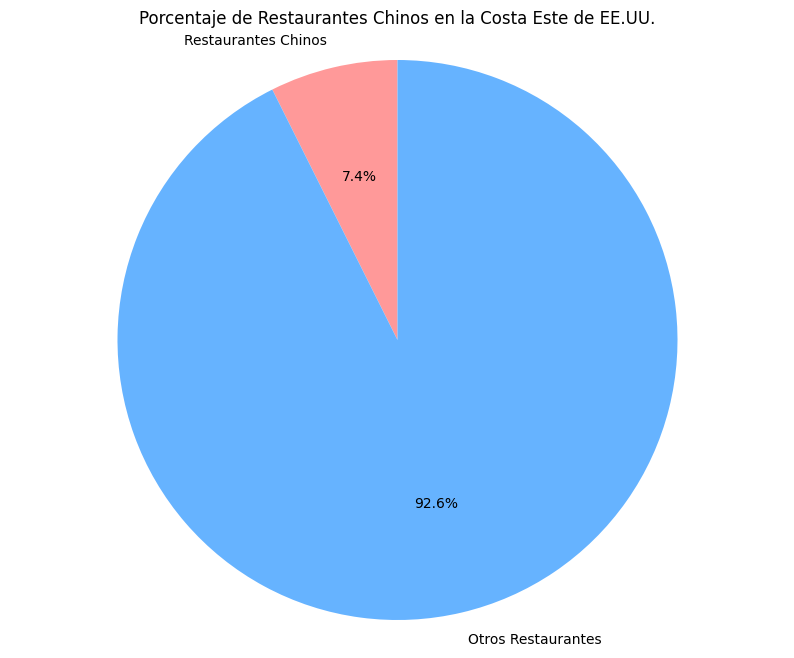

C:\Users\54370\AppData\Local\Temp\ipykernel_38892\679778966.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restaurants['is_chinese'] = df_restaurants['gmap_id'].isin(df_chinese_resto['gmap_id'])


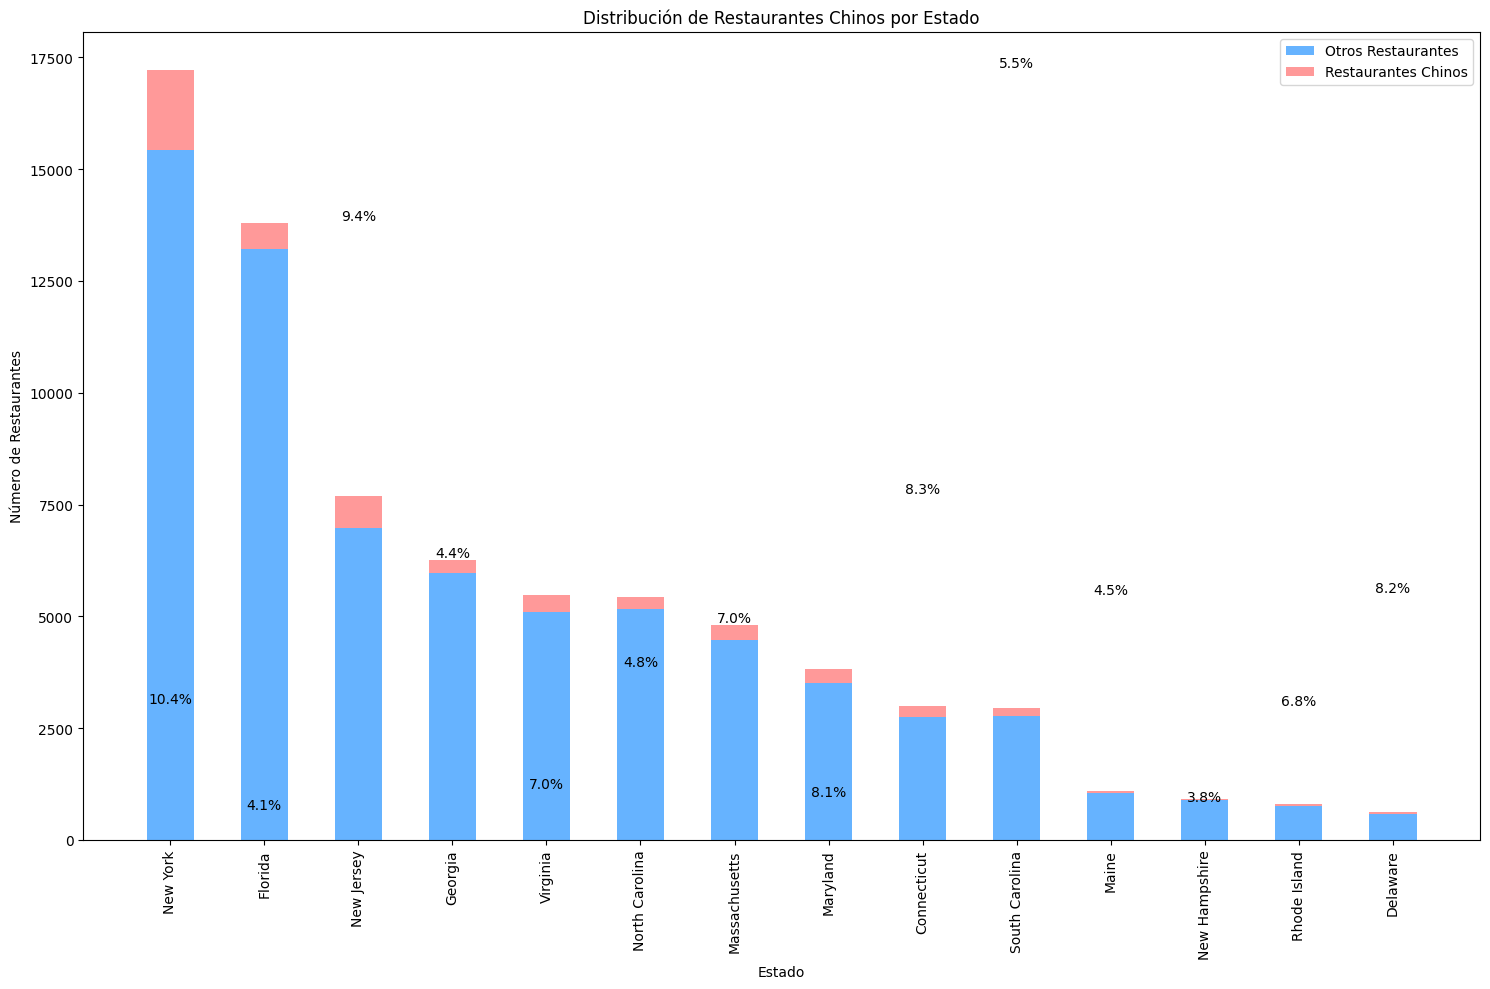

In [45]:
# Gráfico de torta para el porcentaje de restaurantes chinos
total_restaurants = len(df_restaurants)
chinese_restaurants = len(df_chinese_resto)
other_restaurants = total_restaurants - chinese_restaurants

plt.figure(figsize=(10, 8))
plt.pie([chinese_restaurants, other_restaurants], 
        labels=['Restaurantes Chinos', 'Otros Restaurantes'],
        autopct='%1.1f%%',
        startangle=90,
        colors=['#ff9999','#66b3ff'])
plt.title('Porcentaje de Restaurantes Chinos en la Costa Este de EE.UU.')
plt.axis('equal')
plt.show()

# Gráfico de barras apiladas por estado
df_restaurants['is_chinese'] = df_restaurants['gmap_id'].isin(df_chinese_resto['gmap_id'])
state_counts = df_restaurants.groupby('nombre_estado').agg({
    'is_chinese': ['sum', 'count']
}).reset_index()
state_counts.columns = ['nombre_estado', 'chinese_count', 'total_count']
state_counts['other_count'] = state_counts['total_count'] - state_counts['chinese_count']
state_counts['chinese_percentage'] = state_counts['chinese_count'] / state_counts['total_count'] * 100

# Ordenar por total de restaurantes
state_counts = state_counts.sort_values('total_count', ascending=False)

plt.figure(figsize=(15, 10))
bar_width = 0.5
index = range(len(state_counts))

plt.bar(index, state_counts['other_count'], bar_width, label='Otros Restaurantes', color='#66b3ff')
plt.bar(index, state_counts['chinese_count'], bar_width, bottom=state_counts['other_count'], 
        label='Restaurantes Chinos', color='#ff9999')

plt.xlabel('Estado')
plt.ylabel('Número de Restaurantes')
plt.title('Distribución de Restaurantes Chinos por Estado')
plt.xticks(index, state_counts['nombre_estado'], rotation=90)
plt.legend()

# Añadir etiquetas de porcentaje
for i, v in enumerate(state_counts['chinese_percentage']):
    plt.text(i, state_counts['total_count'][i], f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## **1. Análisis del Sector Gastronómico de Restaurantes Chinos**

### **Comparación del mercado de comida china**
### **Restaurantes con mayor cantidad de locales**

C:\Users\54370\AppData\Local\Temp\ipykernel_38892\2671146370.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_restaurants.values, y=top_10_restaurants.index, palette='coolwarm')


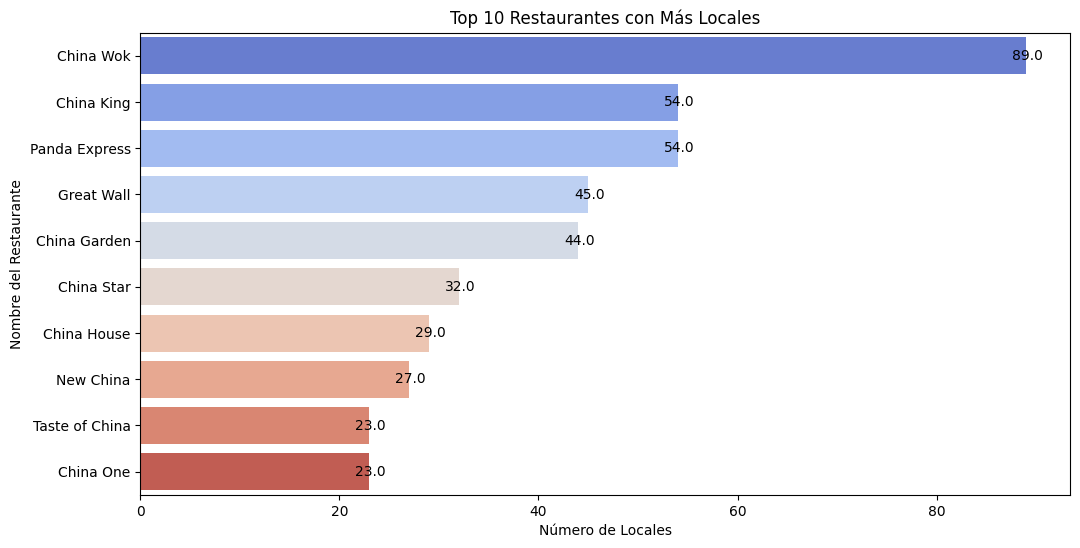

In [12]:

# Contamos la cantidad de locales de cada restaurante según el nombre
restaurant_counts = df_chinese_resto['name'].value_counts()

# Obtenemos el top 10 de restaurantes con más locales
top_10_restaurants = restaurant_counts.head(10)

# Visualizamos los resultados
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras con Seaborn
ax = sns.barplot(x=top_10_restaurants.values, y=top_10_restaurants.index, palette='coolwarm')

# Añadimos etiquetas y título
plt.title('Top 10 Restaurantes con Más Locales')
plt.xlabel('Número de Locales')
plt.ylabel('Nombre del Restaurante')

# Añadimos anotaciones de las cantidades en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 0.1, p.get_y() + p.get_height() / 2), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='black')
 
# Mostramos el gráfico
plt.show()

### **Top 20 de los restaurantes con más locales de comida China con mejor calificación promedio**

C:\Users\54370\AppData\Local\Temp\ipykernel_38892\3581640071.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_avg_ratings.values, y=top_10_avg_ratings.index, palette='coolwarm')


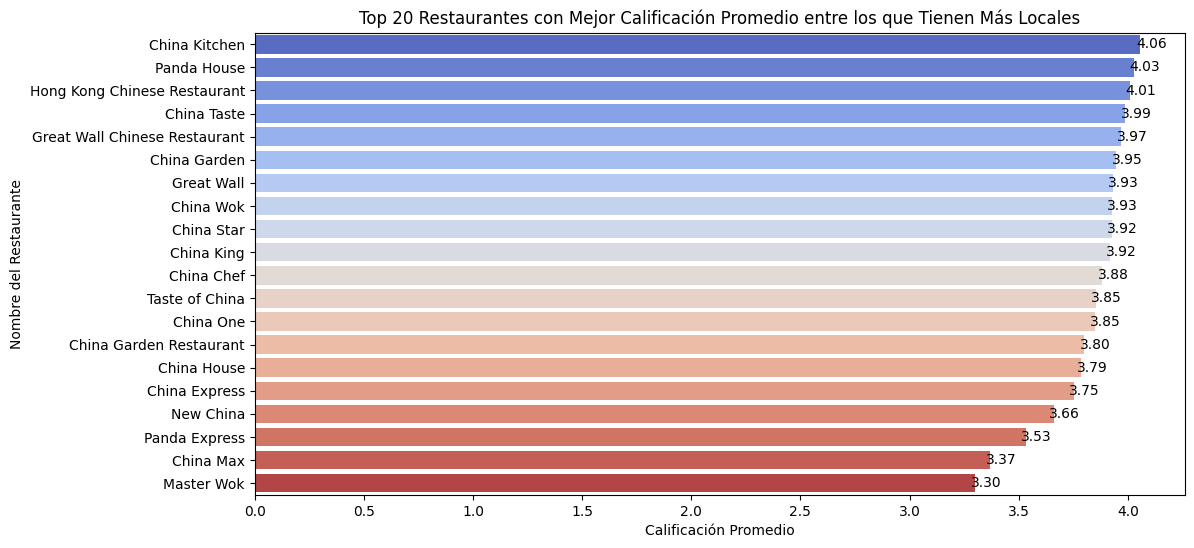

In [13]:

# Contamos la cantidad de locales de cada restaurante según el nombre
restaurant_counts = df_chinese_resto['name'].value_counts()

# Obtenemos el top 10 de restaurantes con más locales
top_10_restaurants = restaurant_counts.head(20).index

# Filtramos el DataFrame original para incluir solo estos restaurantes
filtered_df = df_chinese_resto[df_chinese_resto['name'].isin(top_10_restaurants)]

# Calculamos la calificación promedio para cada restaurante en el top 10
avg_ratings = filtered_df.groupby('name')['avg_rating'].mean()

# Ordenamos los restaurantes por calificación promedio y seleccionar el top 10
top_10_avg_ratings = avg_ratings.sort_values(ascending=False).head(20)

# Visualizamos los resultados
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras con Seaborn
ax = sns.barplot(x=top_10_avg_ratings.values, y=top_10_avg_ratings.index, palette='coolwarm')

# Añadimos etiquetas y título
plt.title('Top 20 Restaurantes con Mejor Calificación Promedio entre los que Tienen Más Locales')
plt.xlabel('Calificación Promedio')
plt.ylabel('Nombre del Restaurante')

# Añadimos anotaciones de las calificaciones en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='black')

# Mostramos el gráfico
plt.show()

### **Top 10 restaurantes con más reseñas entre los que tienen más locales**

C:\Users\54370\AppData\Local\Temp\ipykernel_38892\1695461408.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_reviews.values, y=top_10_reviews.index, palette='coolwarm')


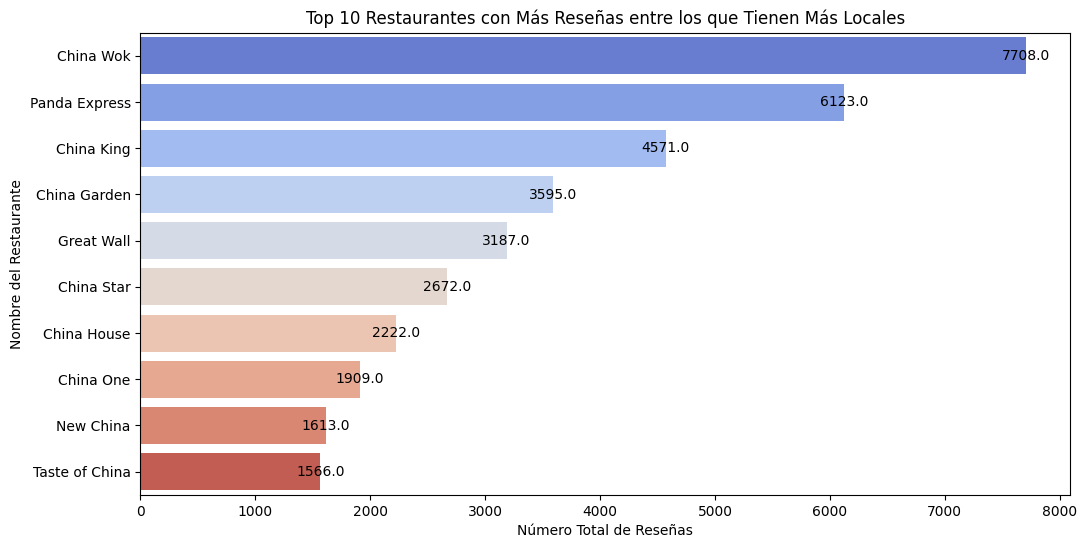

In [14]:
# Contamos la cantidad de locales de cada restaurante según el nombre
restaurant_counts = df_chinese_resto['name'].value_counts()

# Obtenemos el top 10 de restaurantes con más locales
top_10_restaurants = restaurant_counts.head(10).index

# Filtramos el DataFrame original para incluir solo estos restaurantes
filtered_df = df_chinese_resto[df_chinese_resto['name'].isin(top_10_restaurants)]

# Contamos el número total de reseñas para cada restaurante en el top 10
total_reviews = filtered_df.groupby('name')['num_of_reviews'].sum()

# Ordenamos los restaurantes por número total de reseñas y seleccionamos el top 10
top_10_reviews = total_reviews.sort_values(ascending=False).head(10)

# Visualizamos los resultados
plt.figure(figsize=(12, 6))

# Creamos el gráfico de barras con Seaborn
ax = sns.barplot(x=top_10_reviews.values, y=top_10_reviews.index, palette='coolwarm')

# Añadimos etiquetas y título
plt.title('Top 10 Restaurantes con Más Reseñas entre los que Tienen Más Locales')
plt.xlabel('Número Total de Reseñas')
plt.ylabel('Nombre del Restaurante')

# Añadimos anotaciones de las reseñas en cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', 
                (p.get_width() + 0.05, p.get_y() + p.get_height() / 2), 
                ha='center', 
                va='center', 
                fontsize=10, 
                color='black')

# Mostramos el gráfico
plt.show()

### **Análisis de calificaciones por estado**

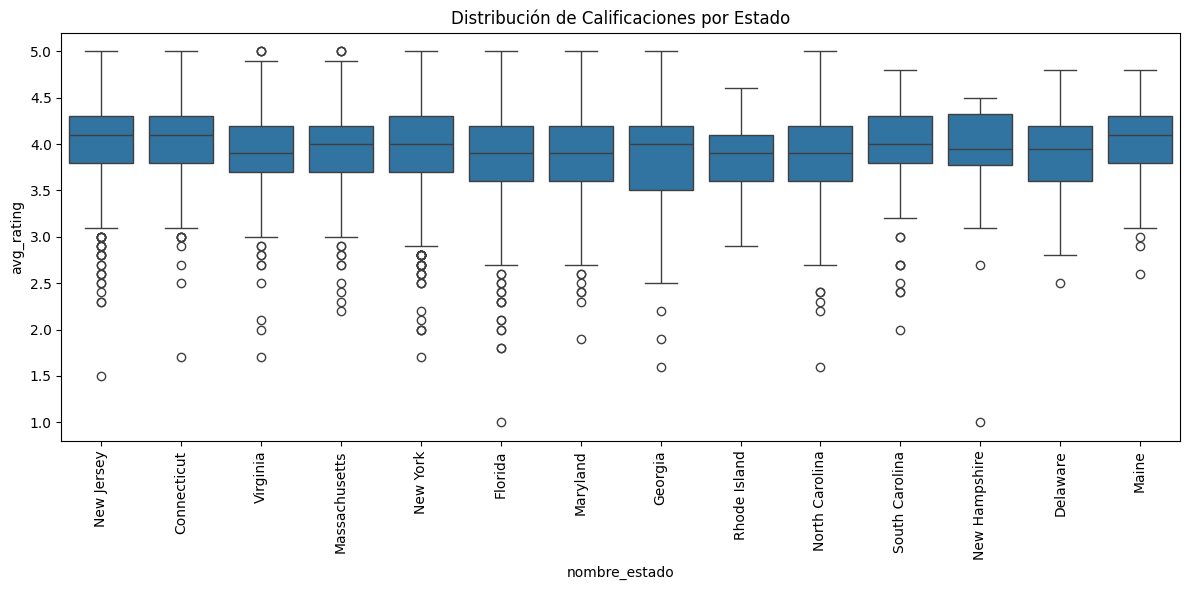

In [15]:
# 1. Análisis de calificaciones por estado
plt.figure(figsize=(12, 6))
sns.boxplot(x='nombre_estado', y='avg_rating', data=df_chinese_resto)
plt.xticks(rotation=90)
plt.title('Distribución de Calificaciones por Estado')
plt.tight_layout()
plt.show()

### **Relación entre número de reseñas y calificación promedio**

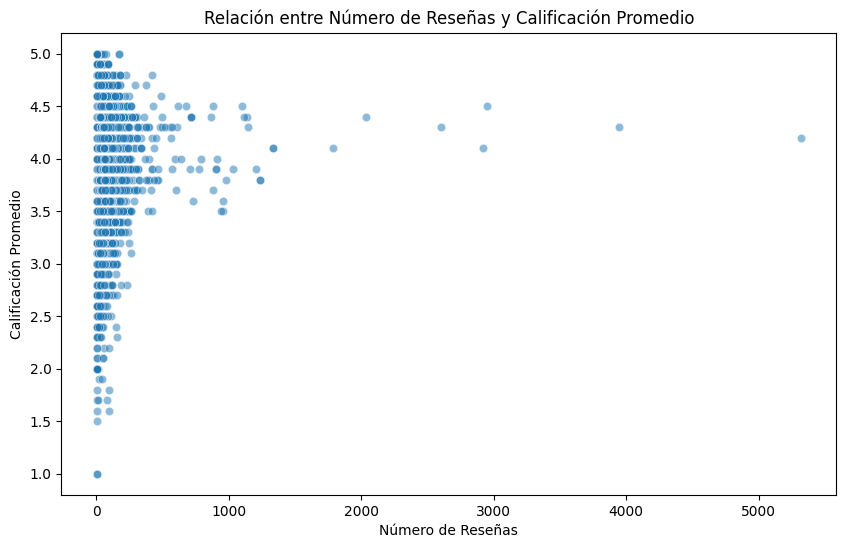

In [16]:
# 2. Relación entre número de reseñas y calificación promedio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='num_of_reviews', y='avg_rating', data=df_chinese_resto, alpha=0.5)
plt.title('Relación entre Número de Reseñas y Calificación Promedio')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.show()

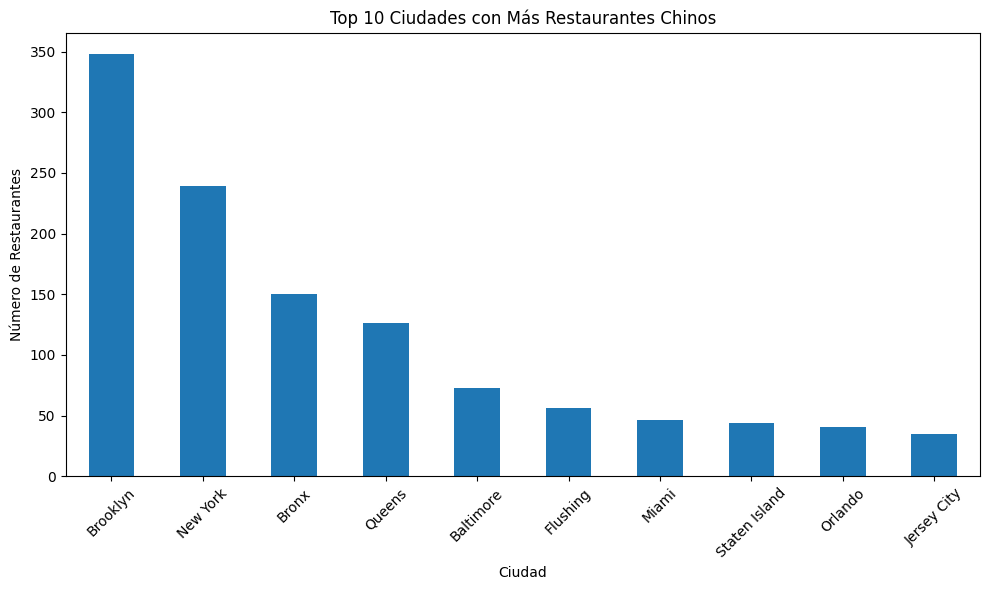

               avg_rating                  num_of_reviews                   
                     mean median       std           mean median         std
nombre_estado                                                               
Connecticut      4.007004   4.10  0.429423      78.922179   68.0   78.943771
Delaware         3.862963   3.95  0.526038      77.962963   71.0   43.996982
Florida          3.858883   3.90  0.539760     121.548223   78.0  300.218165
Georgia          3.867474   4.00  0.527488     106.044983   78.0  161.793769
Maine            3.985185   4.10  0.472411      83.148148   73.0   54.402555
Maryland         3.888623   3.90  0.502835      79.149701   65.0   85.244896
Massachusetts    3.966006   4.00  0.460398      80.161473   66.0   71.791835
New Hampshire    3.888889   3.95  0.665380     110.527778   96.0  112.003695
New Jersey       3.994094   4.10  0.441914      68.170470   58.0   55.848530
New York         3.971753   4.00  0.446526      65.114177   55.0   93.700068

In [17]:
# 3. Top 10 ciudades con más restaurantes chinos
top_10_cities = df_chinese_resto['city'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar')
plt.title('Top 10 Ciudades con Más Restaurantes Chinos')
plt.xlabel('Ciudad')
plt.ylabel('Número de Restaurantes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Análisis estadístico
print(df_chinese_resto.groupby('nombre_estado')[['avg_rating', 'num_of_reviews']].agg(['mean', 'median', 'std']))

## **2. Análisis específico de la cadena China Garden**

In [18]:
# Filtramos los restaurantes 'China Garden'
df_china_garden = df_chinese_resto[df_chinese_resto['name'] == 'China Garden']

# Contamos el número de locales
num_locales = len(df_china_garden)

# Calculamos el promedio de 'avg_rating'
avg_rating_total = df_china_garden['avg_rating'].mean()

print(f"Número de locales de China Garden: {num_locales}")
print(f"Puntuación promedio (avg_rating) de China Garden: {avg_rating_total:.2f}")

# Mostramos los primeros registros para verificación
print("\nPrimeros registros de China Garden:")
print(df_china_garden[['name', 'address', 'avg_rating', 'estado']].head())

Número de locales de China Garden: 44
Puntuación promedio (avg_rating) de China Garden: 3.95

Primeros registros de China Garden:
                name                                            address  \
172181  China Garden    China Garden, 209 North Ave, Dunellen, NJ 08812   
276732  China Garden  China Garden, 108 W Main St STE D, Jamestown, ...   
277973  China Garden  China Garden, 3300 N Roosevelt Blvd 5618 296, ...   
321981  China Garden  China Garden, 111 W Church St, Troutman, NC 28166   
381922  China Garden  China Garden, 900 Kinderkamack Rd, River Edge,...   

        avg_rating estado  
172181         3.7     NJ  
276732         4.2     NC  
277973         3.9     FL  
321981         4.2     NC  
381922         3.8     NJ  


In [19]:
df_china_garden[['name', 'avg_rating', 'city', 'nombre_estado', 'num_of_reviews']].sort_values(by='num_of_reviews', ascending=False)


,name,avg_rating,city,nombre_estado,num_of_reviews
277973,China Garden,3.9,Key West,Florida,254
2471858,China Garden,4.1,Milledgeville,Georgia,208
590192,China Garden,3.6,Cameron,North Carolina,195
2118991,China Garden,3.7,Jefferson,Georgia,177
2540701,China Garden,4.1,Lakeland,Florida,146
666593,China Garden,4.0,Central Islip,New York,138
2494470,China Garden,4.3,Emporia,Virginia,128
813407,China Garden,3.8,Big Pine Key,Florida,127
2875688,China Garden,4.4,Braselton,Georgia,116
2690503,China Garden,3.6,Ansonia,Connecticut,108


### **Distribución de restaurantes China Garden por ciudad:**

In [20]:
# Agrupamos por ciudad y contar el número de restaurantes
city_distribution = df_china_garden.groupby('city').size().sort_values(ascending=False).reset_index(name='count')

# Calculamos el rating promedio por ciudad
city_avg_rating = df_china_garden.groupby('city')['avg_rating'].mean().round(2)

# Combinamos el conteo y el rating promedio
city_analysis = city_distribution.merge(city_avg_rating, on='city', how='left')

# Renombramos las columnas para mayor claridad
city_analysis.columns = ['Ciudad', 'Número de Restaurantes', 'Rating Promedio']

# Mostramos los resultados
print("Distribución de restaurantes China Garden por ciudad:")
print(city_analysis.to_string(index=False))

# Calculamos y mostramos estadísticas generales
total_restaurants = city_analysis['Número de Restaurantes'].sum()
total_cities = len(city_analysis)
overall_avg_rating = df_china_garden['avg_rating'].mean()

print(f"\nEstadísticas Generales:")
print(f"Total de restaurantes China Garden: {total_restaurants}")
print(f"Número de ciudades con presencia: {total_cities}")
print(f"Rating promedio general: {overall_avg_rating:.2f}")

Distribución de restaurantes China Garden por ciudad:
           Ciudad  Número de Restaurantes  Rating Promedio
       Alexandria                       3              3.8
         Brooklyn                       2              3.9
          Ansonia                       1              3.6
     Big Pine Key                       1              3.8
        Baltimore                       1              3.7
        Braselton                       1              4.4
       Burlington                       1              4.4
           Camden                       1              3.3
          Cameron                       1              3.6
        Canastota                       1              4.3
    Central Islip                       1              4.0
        Cleveland                       1              3.2
         Dayville                       1              4.2
       Dolgeville                       1              4.4
         Dunellen                       1              3.7
  

### **KPI: Promedio de puntaje de la cadena China Garden** 
#### **"Índice de Desviación del Rating Objetivo" (IDRO)**
#### **Análisis de restaurantes China Garden por ciudad, incluyendo IDRO:**


In [21]:
# Definimos el rating objetivo
rating_objetivo = 4.5

# Calculamos el IDRO (Índice de Desviación del Rating Objetivo)
city_analysis['IDRO'] = ((city_analysis['Rating Promedio'] - rating_objetivo) / rating_objetivo * 100).round(2)

# Ordenamos el DataFrame por IDRO de forma ascendente (mejor desempeño primero)
city_analysis_sorted = city_analysis.sort_values('IDRO', ascending=True)

# Mostramos los resultados
print("Análisis de restaurantes China Garden por ciudad, incluyendo IDRO:")
print(city_analysis_sorted.to_string(index=False))

# Calculamos estadísticas del IDRO
idro_promedio = city_analysis['IDRO'].mean()
mejor_idro = city_analysis['IDRO'].max()
peor_idro = city_analysis['IDRO'].min()

print(f"\nEstadísticas del IDRO:")
print(f"IDRO promedio: {idro_promedio:.2f}%")
print(f"Mejor IDRO: {mejor_idro:.2f}%")
print(f"Peor IDRO: {peor_idro:.2f}%")

# Identificamos las ciudades con mejor y peor desempeño
mejor_ciudad = city_analysis.loc[city_analysis['IDRO'] == mejor_idro, 'Ciudad'].iloc[0]
peor_ciudad = city_analysis.loc[city_analysis['IDRO'] == peor_idro, 'Ciudad'].iloc[0]

print(f"\nMejor desempeño: {mejor_ciudad} con IDRO de {mejor_idro:.2f}%")
print(f"Peor desempeño: {peor_ciudad} con IDRO de {peor_idro:.2f}%")

Análisis de restaurantes China Garden por ciudad, incluyendo IDRO:
           Ciudad  Número de Restaurantes  Rating Promedio   IDRO
        Cleveland                       1              3.2 -28.89
           Camden                       1              3.3 -26.67
     White Plains                       1              3.3 -26.67
       Loganville                       1              3.5 -22.22
     Jacksonville                       1              3.6 -20.00
          Ansonia                       1              3.6 -20.00
      Southampton                       1              3.6 -20.00
          Cameron                       1              3.6 -20.00
        Jefferson                       1              3.7 -17.78
         Dunellen                       1              3.7 -17.78
        Baltimore                       1              3.7 -17.78
       Livingston                       1              3.8 -15.56
     Big Pine Key                       1              3.8 -15.56
       Al

### **Top 10 Ciudades con mejor Rating Promedio por Ciudad**

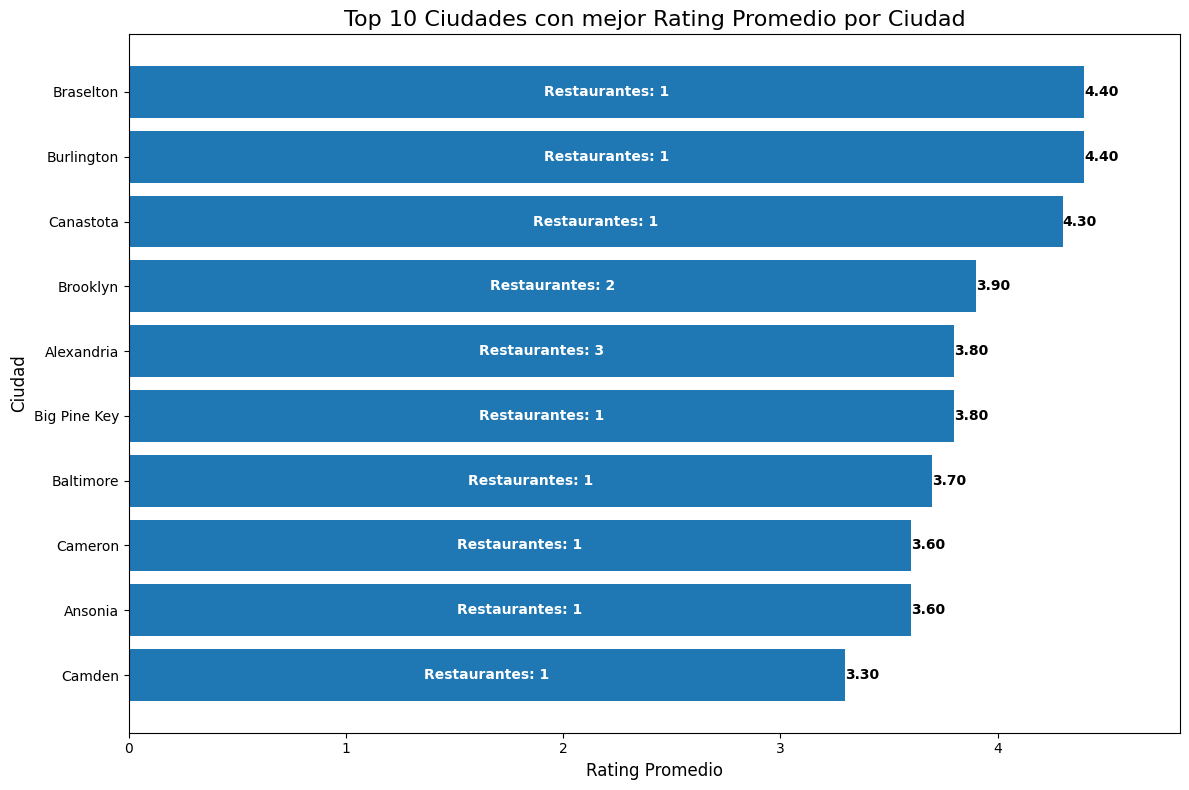

In [22]:
# Ordenamos los datos por número de restaurantes y tomamos las top 10 ciudades
top_10_cities = city_analysis.sort_values('Número de Restaurantes', ascending=False).head(10)

# Ordenamos las top 10 ciudades por rating promedio
top_10_cities_sorted = top_10_cities.sort_values('Rating Promedio', ascending=True)

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
bars = plt.barh(top_10_cities_sorted['Ciudad'], top_10_cities_sorted['Rating Promedio'])

# Personalizamos el gráfico
plt.title('Top 10 Ciudades con mejor Rating Promedio por Ciudad', fontsize=16)
plt.xlabel('Rating Promedio', fontsize=12)
plt.ylabel('Ciudad', fontsize=12)

# Añadimos etiquetas de valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}',
             ha='left', va='center', fontweight='bold')

# Añadimos el número de restaurantes como texto en cada barra
for i, bar in enumerate(bars):
    num_restaurants = top_10_cities_sorted.iloc[i]['Número de Restaurantes']
    plt.text(bar.get_width()/2, bar.get_y() + bar.get_height()/2,
             f'Restaurantes: {num_restaurants}',
             ha='center', va='center', color='white', fontweight='bold')

# Ajustamos los límites del eje x para que todas las etiquetas sean visibles
plt.xlim(0, max(top_10_cities_sorted['Rating Promedio']) * 1.1)

plt.tight_layout()
plt.show()

In [23]:
df_china_garden['nombre_estado'].value_counts()

nombre_estado
New York          9
New Jersey        8
Florida           6
Virginia          5
North Carolina    5
Georgia           4
Connecticut       4
Maryland          2
Rhode Island      1
Name: count, dtype: int64

### **Ubicación de los locales de China Garden**

In [24]:
# Creamos un mapa centrado en el punto promedio de todas las ubicaciones
map_center = [df_china_garden['latitude'].mean(), df_china_garden['longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=14)

# Añadimos marcadores para cada local
for _, row in df_china_garden.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Guardamos el mapa en un archivo HTML
m.save('china_garden_map.html')

# Para visualizar en Jupyter Notebook, descomentar la siguiente línea
m

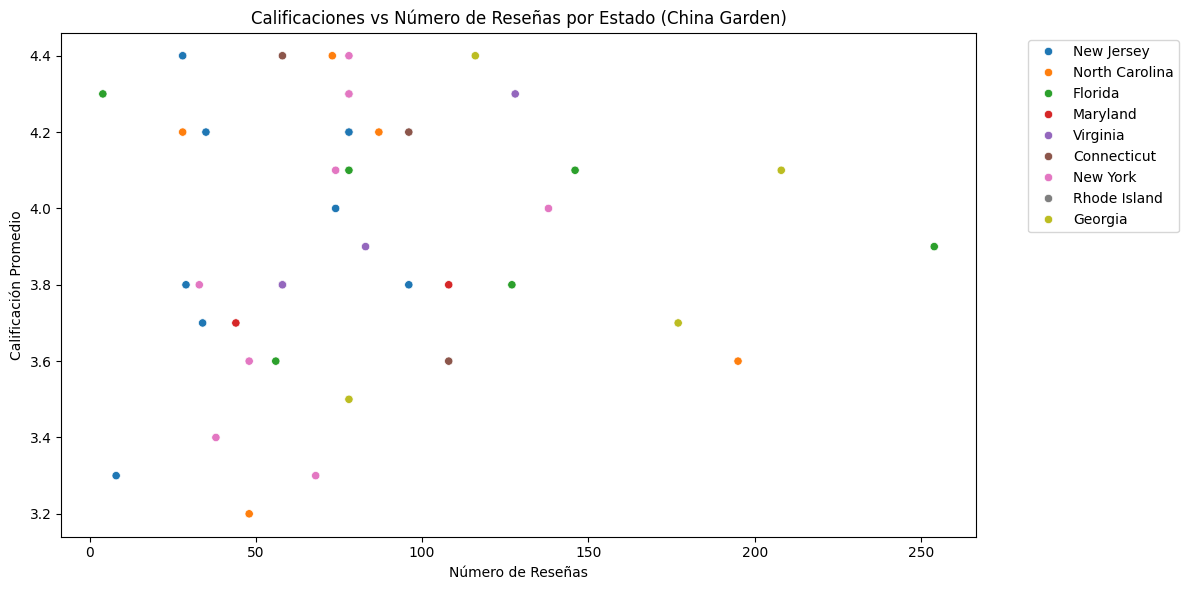

In [25]:
# 3. Comparación de calificaciones y número de reseñas por estado
plt.figure(figsize=(12, 6))
sns.scatterplot(x='num_of_reviews', y='avg_rating', hue='nombre_estado', data=df_china_garden)
plt.title('Calificaciones vs Número de Reseñas por Estado (China Garden)')
plt.xlabel('Número de Reseñas')
plt.ylabel('Calificación Promedio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

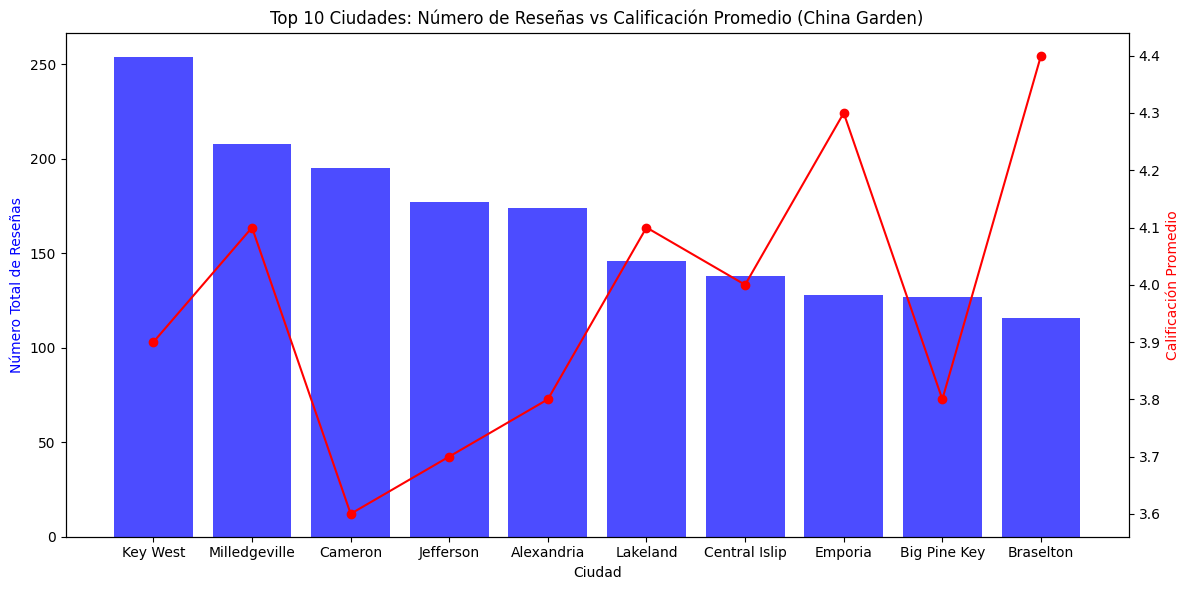

In [26]:
# 4. Análisis de rendimiento por ciudad
city_performance = df_china_garden.groupby('city').agg({
    'avg_rating': 'mean',
    'num_of_reviews': 'sum'
}).sort_values('num_of_reviews', ascending=False).head(10)

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.bar(city_performance.index, city_performance['num_of_reviews'], alpha=0.7, color='b')
ax2.plot(city_performance.index, city_performance['avg_rating'], color='r', marker='o')
ax1.set_xlabel('Ciudad')
ax1.set_ylabel('Número Total de Reseñas', color='b')
ax2.set_ylabel('Calificación Promedio', color='r')
plt.title('Top 10 Ciudades: Número de Reseñas vs Calificación Promedio (China Garden)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
df_china_garden.head(3)

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city
172181,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,Chinese restaurant,3.7,34,NJ,New Jersey,Dunellen
276732,China Garden,"China Garden, 108 W Main St STE D, Jamestown, ...",0x88530fea3a837eef:0xb20c7dce9609954c,35.994114,-79.936839,Chinese restaurant,4.2,28,NC,North Carolina,Jamestown
277973,China Garden,"China Garden, 3300 N Roosevelt Blvd 5618 296, ...",0x88d1b144ffd32bf1:0x15ddeb4fe829259,24.569117,-81.764478,Chinese restaurant,3.9,254,FL,Florida,Key West


#### **Carga de dataframe de Reseñas de la costa este - Google**

In [28]:
df_review_estados = pd.read_parquet('Datasets/Google/review-estados/review_estados_ce.parquet')

In [29]:
df_review_estados.head(3)

,user_id,name,time,rating,text,gmap_id
0,1.140765e+20,Jeff Mccomish,1612059976820,5,Great friendly independent packie,0x89e64b04d274c9d9:0x84d833dcc10ae21d
1,1.015203e+20,Outlaw PiRu,1544752859553,5,Great Atmosphere and Great Service. Fantastic ...,0x89e64b04d274c9d9:0x84d833dcc10ae21d
2,1.118002e+20,Hector Acevedo,1564367962353,5,Nice neighborhood store with great sandwiches ...,0x89e64b04d274c9d9:0x84d833dcc10ae21d


### **Unión DataFrame "china garden" con "review-estados"**

In [30]:
df_china_garden_reviews = pd.merge(df_china_garden, df_review_estados, on='gmap_id', how='inner')  # inner, left, right, outer

In [31]:
df_china_garden_reviews.head(3)

,name_x,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,estado,nombre_estado,city,user_id,name_y,time,rating,text
0,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,Chinese restaurant,3.7,34,NJ,New Jersey,Dunellen,1.125038e+20,John Campbell,1544466023862,4,Good food good prices
1,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,Chinese restaurant,3.7,34,NJ,New Jersey,Dunellen,1.076216e+20,Cheryl Kimble,1483899014865,5,The food is good and they are quick to prepare.
2,China Garden,"China Garden, 209 North Ave, Dunellen, NJ 08812",0x89c3b9050ecda13d:0xe7d0cc1f0b785345,40.592636,-74.461681,Chinese restaurant,3.7,34,NJ,New Jersey,Dunellen,1.142247e+20,Spencer Duncan,1468894704924,4,bizarre place but the food was pretty good act...


#### **Transfomación de tiempo**

In [32]:
df_china_garden_reviews['time'] = pd.to_datetime(df_china_garden_reviews['time'], unit='ms')
df_china_garden_reviews['date'] = df_china_garden_reviews['time'].dt.date
del df_china_garden_reviews['time']

In [33]:
df_china_garden_reviews['date'].head()

0    2018-12-10
1    2017-01-08
2    2016-07-19
3    2017-06-12
4    2015-09-15
Name: date, dtype: object

#### **Crear columna Year**

In [34]:
df_china_garden_reviews['date'] = pd.to_datetime(df_china_garden_reviews['date'])
df_china_garden_reviews['year'] = df_china_garden_reviews['date'].dt.year

In [35]:
df_china_garden_reviews['year'].head()

0    2018
1    2017
2    2016
3    2017
4    2015
Name: year, dtype: int32

In [36]:
print(df_china_garden_reviews['date'].dt.date.min())
print(df_china_garden_reviews['date'].dt.date.max())

2010-08-10
2021-06-20


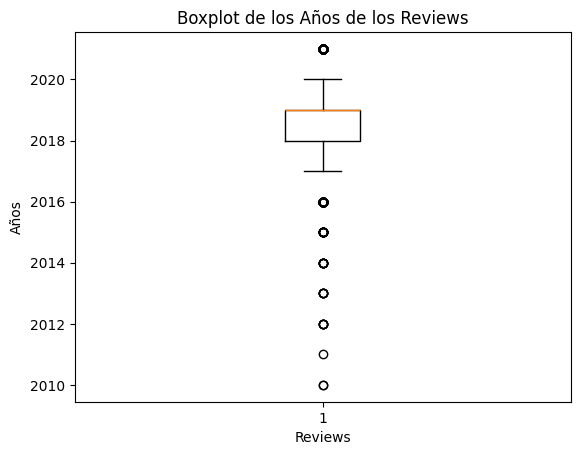

In [37]:
plt.boxplot(df_china_garden_reviews['year'])
plt.title('Boxplot de los Años de los Reviews')
plt.ylabel('Años')
plt.xlabel('Reviews')
plt.show()

In [38]:
Q1 = df_china_garden_reviews['date'].dt.year.quantile(0.25)
Q3 = df_china_garden_reviews['date'].dt.year.quantile(0.75)
IQR = Q3 - Q1

# Determinar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los registros que son outliers en los años
outliers = df_china_garden_reviews[(df_china_garden_reviews['year'] < lower_bound) | (df_china_garden_reviews['year'] > upper_bound)]


# Contar los registros por cada año outlier
outliers_count = outliers['year'].value_counts().reset_index()
outliers_count.columns = ['year', 'count']

# Mostrar el resultado
print(outliers_count)

   year  count
0  2021    130
1  2016     89
2  2015     19
3  2014      7
4  2012      5
5  2013      5
6  2010      2
7  2011      1


### **Distribución de los Reviews por Año y Estado**

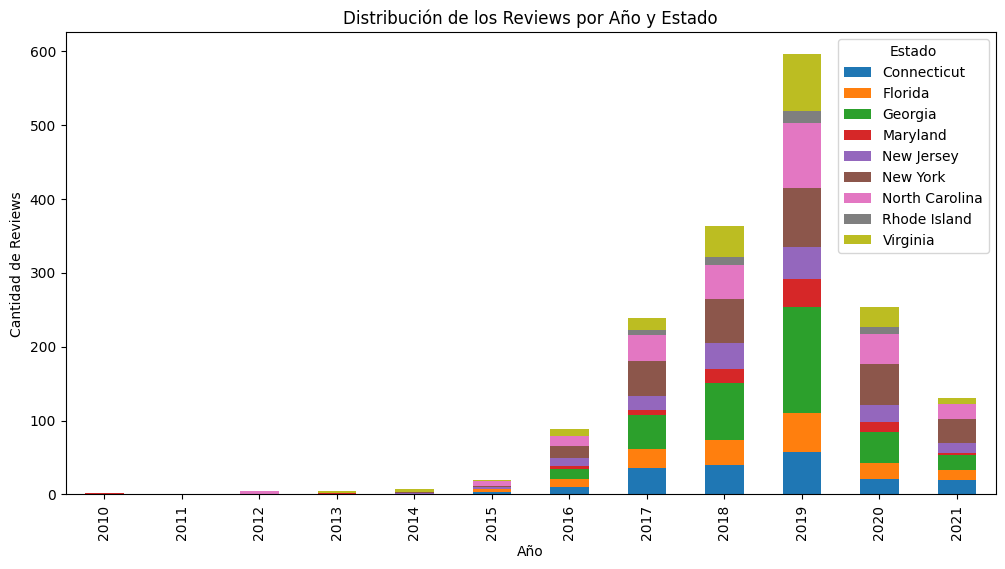

In [39]:
reviews_per_year_state = df_china_garden_reviews.groupby(['year', 'nombre_estado']).size().unstack().fillna(0)

# Crear el histograma apilado
reviews_per_year_state.plot(kind='bar', stacked=True, figsize=(12, 6))

# Ajustar el título y las etiquetas
plt.title('Distribución de los Reviews por Año y Estado')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Estado')

# Mostrar el gráfico
plt.show()

### **Cantidad de Reviews por Año y Estado**

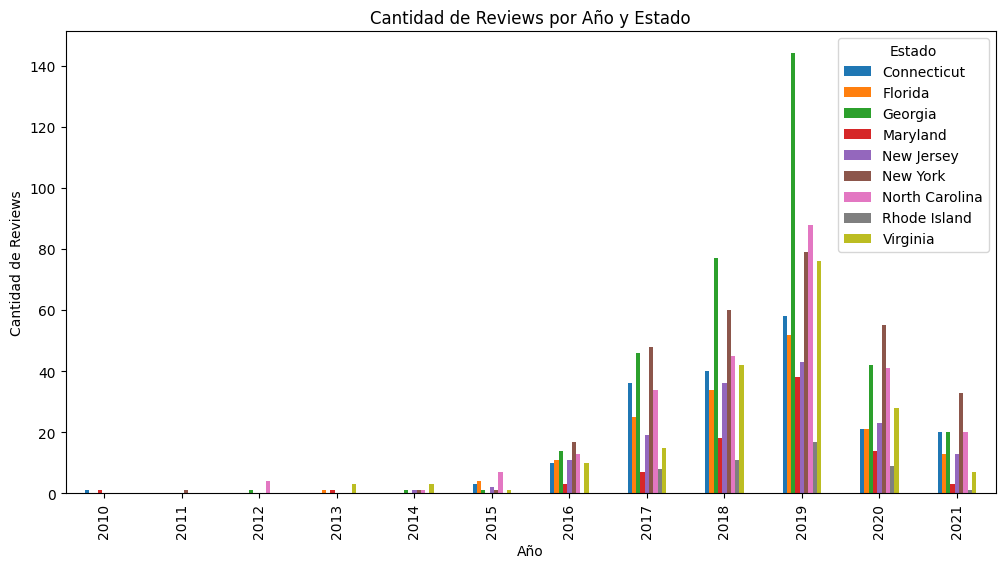

In [40]:
reviews_per_year_state = df_china_garden_reviews.groupby(['year', 'nombre_estado']).size().unstack().fillna(0)

# Crear el gráfico de barras
reviews_per_year_state.plot(kind='bar', figsize=(12, 6))

# Ajustar el título y las etiquetas
plt.title('Cantidad de Reviews por Año y Estado')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reviews')
plt.legend(title='Estado')

# Mostrar el gráfico
plt.show()

### **Nube de palabras del Reseñas de China Garden**

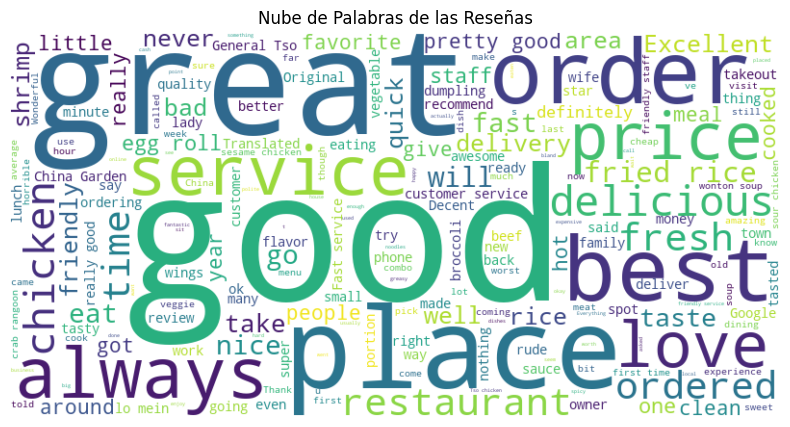

In [43]:
#import nltk
from nltk.corpus import stopwords
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Creamos la lista de palabras a excluir
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "None", "Chinese", "food"])

# Convertimos todos los valores en la columna 'text' a cadenas de texto
# y los unimos en una sola cadena
text = " ".join(str(text) for text in df_china_garden_reviews['text'] if str(text) != 'None')

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de las Reseñas')
plt.show()

### **Nube de palabras del total de Restaurantes chinos**

In [ ]:
# Unión de Reseñas con dataframe de Restaurantes chinos
df_chinese_resto_review = pd.merge(df_chinese_resto, df_review_estados, on='gmap_id', how='inner')  # inner, left, right, outer


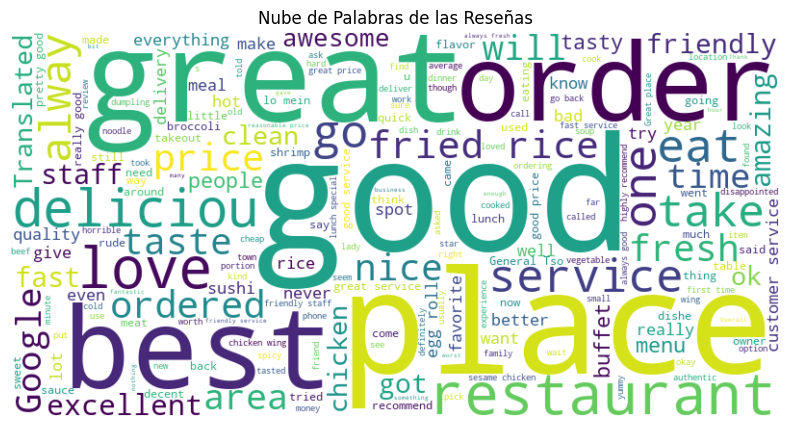

In [ ]:
# Creamos la lista de palabras a excluir
stopwords = set(STOPWORDS)
stopwords.update(["br", "href", "None", "Chinese", "food"])

# Convertimos todos los valores en la columna 'text' a cadenas de texto
# y los unimos en una sola cadena
text = " ".join(str(text) for text in df_chinese_resto_review['text'] if str(text) != 'None')

# Creamos la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='white', width=800, height=400).generate(text)

# Mostramos la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de Palabras de las Reseñas')
plt.show()

### **Top 20 palabras más usadas China Garden**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Agregamos palabras adicionales a excluir
stop_words.update(["br", "href", "none", "chinese", "food", "restaurant"])

# Función para limpiar y tokenizar el texto
def clean_and_tokenize(text):
    # Convertimos a minúsculas y eliminar caracteres no alfanuméricos
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Tokenizamos (dividir en palabras individuales)
    tokens = text.split()
    # Eliminamos stopwords y palabras cortas (menos de 3 caracteres)
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Aplicamos la función a la columna 'text' y aplanar la lista
all_words = [word for sublist in df_china_garden_reviews['text'].apply(clean_and_tokenize) for word in sublist]

# Contamos las palabras
word_counts = Counter(all_words)

# Obtenemos las 20 palabras más frecuentes
top_20_words = word_counts.most_common(20)

# Imprimimos los resultados
print("Las 20 palabras más usadas:")
for word, count in top_20_words:
    print(f"{word}: {count}")

# Opcional: crear un DataFrame con los resultados
top_20_df_china_garden = pd.DataFrame(top_20_words, columns=['Palabra', 'Frecuencia'])
print(top_20_df_china_garden)

Las 20 palabras más usadas:
good: 444
great: 239
place: 176
service: 158
chicken: 131
always: 119
best: 113
rice: 110
order: 102
love: 86
time: 85
delicious: 78
fried: 74
fast: 73
ordered: 70
friendly: 64
prices: 63
nice: 63
fresh: 62
like: 61
      Palabra  Frecuencia
0        good         444
1       great         239
2       place         176
3     service         158
4     chicken         131
5      always         119
6        best         113
7        rice         110
8       order         102
9        love          86
10       time          85
11  delicious          78
12      fried          74
13       fast          73
14    ordered          70
15   friendly          64
16     prices          63
17       nice          63
18      fresh          62
19       like          61


[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


### **TOP 20 palabras más usadas en reviews de "Restaurantes Chinos"**

In [ ]:
from nltk.corpus import stopwords
# Descargamos stopwords en inglés (ya que los comentarios parecen estar en inglés)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Agregamos palabras adicionales a excluir
stop_words.update(["br", "href", "none", "chinese", "food", "restaurant"])

# Asumimos que 'df_unido' es tu DataFrame. Si no es así, cárgalo aquí:
# df_unido = pd.read_csv('tu_archivo.csv')

# Función para limpiar y tokenizar el texto
def clean_and_tokenize(text):
    # Convertimos a minúsculas y eliminar caracteres no alfanuméricos
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Tokenizamos (dividir en palabras individuales)
    tokens = text.split()
    # Eliminamos stopwords y palabras cortas (menos de 3 caracteres)
    return [word for word in tokens if word not in stop_words and len(word) > 2]

# Aplicamos la función a la columna 'text' y aplanar la lista
all_words = [word for sublist in df_chinese_resto_review['text'].apply(clean_and_tokenize) for word in sublist]

# Contamos las palabras
word_counts = Counter(all_words)

# Obtenemos las 20 palabras más frecuentes
top_20_words = word_counts.most_common(20)

# Imprimimos los resultados
print("Las 20 palabras más usadas:")
for word, count in top_20_words:
    print(f"{word}: {count}")

# Opcional: creamos un DataFrame con los resultados
top_20_df_chinese_resto = pd.DataFrame(top_20_words, columns=['Palabra', 'Frecuencia'])
print(top_20_df_chinese_resto)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


Las 20 palabras más usadas:
good: 50234
great: 32508
place: 24352
service: 21376
best: 15958
chicken: 14970
always: 14196
order: 12012
love: 10647
like: 10374
rice: 10089
time: 9877
delicious: 9333
friendly: 9148
nice: 9053
fresh: 8090
get: 8052
fried: 7672
staff: 7503
fast: 7203
      Palabra  Frecuencia
0        good       50234
1       great       32508
2       place       24352
3     service       21376
4        best       15958
5     chicken       14970
6      always       14196
7       order       12012
8        love       10647
9        like       10374
10       rice       10089
11       time        9877
12  delicious        9333
13   friendly        9148
14       nice        9053
15      fresh        8090
16        get        8052
17      fried        7672
18      staff        7503
19       fast        7203


      Palabra  Frecuencia_CR  Frecuencia_CG
0        good        50234.0          444.0
1       great        32508.0          239.0
2       place        24352.0          176.0
3     service        21376.0          158.0
4        best        15958.0          113.0
5     chicken        14970.0          131.0
6      always        14196.0          119.0
7       order        12012.0          102.0
8        love        10647.0           86.0
9        like        10374.0           61.0
10       rice        10089.0          110.0
11       time         9877.0           85.0
12  delicious         9333.0           78.0
13   friendly         9148.0           64.0
14       nice         9053.0           63.0
15      fresh         8090.0           62.0
16        get         8052.0            0.0
17      fried         7672.0           74.0
18      staff         7503.0            0.0
19       fast         7203.0           73.0
20    ordered            0.0           70.0
21     prices            0.0    

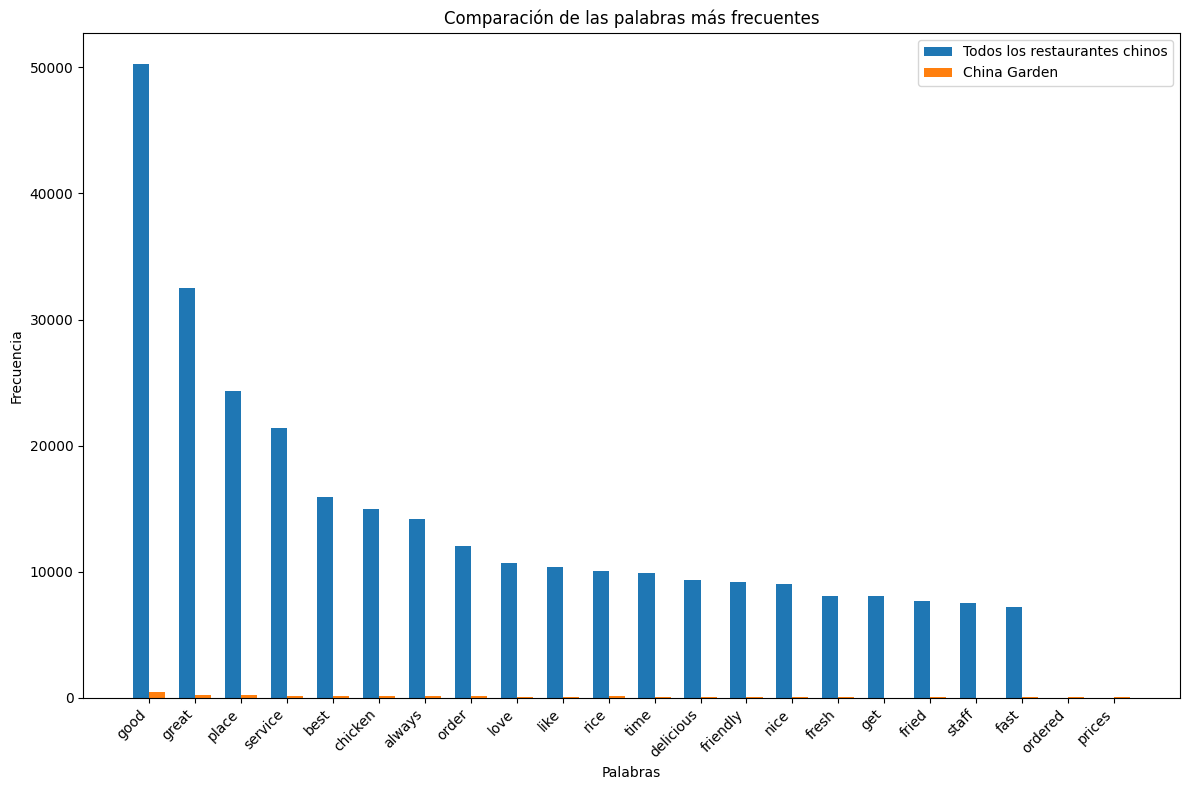

In [ ]:
# Renombramos las columnas para distinguir entre los dos conjuntos de datos
top_20_df_cr = top_20_df_chinese_resto.rename(columns={'Frecuencia': 'Frecuencia_CR'})
top_20_df_cg = top_20_df_china_garden.rename(columns={'Frecuencia': 'Frecuencia_CG'})

# Combinamos los DataFrames usando un outer join en la columna 'Palabra'
df_comparativo = pd.merge(top_20_df_cr, top_20_df_cg, on='Palabra', how='outer')

# Rellenamos los valores NaN con 0
df_comparativo = df_comparativo.fillna(0)

# Ordenamos el DataFrame por la suma de las frecuencias en orden descendente
df_comparativo['Total'] = df_comparativo['Frecuencia_CR'] + df_comparativo['Frecuencia_CG']
df_comparativo = df_comparativo.sort_values('Total', ascending=False)

# Eliminamos la columna 'Total' si no la necesitas en el resultado final
df_comparativo = df_comparativo.drop('Total', axis=1)

# Reseteamos el índice
df_comparativo = df_comparativo.reset_index(drop=True)

# Mostramos el DataFrame comparativo
print(df_comparativo)

# Opcional: Guardar el DataFrame comparativo en un archivo CSV
# df_comparativo.to_csv('comparativo_palabras_frecuentes.csv', index=False)

# Opcional: Crear un gráfico de barras comparativo
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(df_comparativo))

plt.bar(index, df_comparativo['Frecuencia_CR'], bar_width, label='Todos los restaurantes chinos')
plt.bar([i + bar_width for i in index], df_comparativo['Frecuencia_CG'], bar_width, label='China Garden')

plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Comparación de las palabras más frecuentes')
plt.xticks([i + bar_width/2 for i in index], df_comparativo['Palabra'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

# Conclusiones y Sugerencias

## 1. Distribución geográfica de restaurantes China Garden:
- Brooklyn tiene la mayor concentración de restaurantes China Garden (3), seguido de varias ciudades con 1 restaurante cada una.
- La calificación promedio de los restaurantes varía entre 3.3 y 4.4, con Brooklyn teniendo una calificación promedio de 3.63.

## 2. Competencia en el mercado:
- China Wok lidera en número de locales (89), seguido por China King y Panda Express (54 cada uno).
- China Garden se ubica en quinto lugar con 44 locales.
- En términos de calificación promedio, China Garden se posiciona bien con 3.95, ocupando el sexto lugar entre los competidores principales.

## 3. Volumen de reseñas:
- China Wok lidera también en número de reseñas (7708), seguido por Panda Express (6123) y China King (4571).
- China Garden se ubica en cuarto lugar con 3595 reseñas, lo que sugiere una buena visibilidad y engagement con los clientes.

## 4. Distribución de hoteles:
- Orlando, FL tiene la mayor concentración de hoteles (5523), seguido por Kissimmee, FL (2848) y Davenport, FL (1744).
- Florida domina claramente en términos de infraestructura hotelera, lo que podría indicar un alto potencial turístico.

## 5. Análisis de sentimientos en reseñas:
- Las palabras más frecuentes en las reseñas incluyen "good", "food", "great", "place", "service", y "order", lo que sugiere una experiencia generalmente positiva de los clientes.
- La presencia de palabras como "delicious", "best", y "always" también indica satisfacción del cliente.

## Conclusiones y recomendaciones:
1. **Expansión geográfica:** Considerar la expansión en ciudades turísticas de Florida, aprovechando la alta concentración de hoteles y el potencial flujo de turistas.
2. **Mejora de la experiencia del cliente:** Enfocarse en mantener y mejorar la calidad del servicio y la comida, ya que son aspectos frecuentemente mencionados en las reseñas.
3. **Competencia:** Analizar las estrategias de China Wok y Panda Express para entender su éxito en términos de expansión y engagement con clientes.
4. **Calidad vs. Cantidad:** Aunque China Garden no lidera en número de locales, mantiene una buena calificación promedio. Considerar una estrategia de crecimiento que mantenga estos estándares de calidad.
5. **Marketing y presencia online:** Fomentar más reseñas de clientes para aumentar la visibilidad online, dado que las reseñas parecen ser generalmente positivas.

## Sugerencias para explorar más datos:
1. **Análisis temporal:** Examinar cómo han evolucionado las calificaciones y el número de reseñas a lo largo del tiempo para identificar tendencias.
2. **Análisis de precios:** Comparar los rangos de precios entre China Garden y sus competidores para identificar oportunidades de posicionamiento.
3. **Análisis demográfico:** Estudiar las características demográficas de las áreas donde China Garden tiene éxito para identificar mercados similares para expansión.
4. **Análisis de menú:** Identificar los platos más populares o mejor calificados para optimizar el menú.
5. **Análisis de sentimientos más detallado:** Realizar un análisis de sentimientos más profundo de las reseñas para identificar áreas específicas de mejora y fortalezas de la marca.
6. **Estudio de estacionalidad:** Analizar si hay patrones estacionales en las calificaciones o volumen de reseñas, especialmente en áreas turísticas.

Estos análisis adicionales proporcionarían una base más sólida para la toma de decisiones estratégicas en la expansión y mejora de China Garden en la costa este de Estados Unidos.